# Materials and Shielding

In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy.testing as npt
from operator import itemgetter, attrgetter
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

2017-12-14 11:33:40


In [190]:
from math import sqrt, pi
from pynext.system_of_units import *
from pynext.Material import PhysicalMaterial
from pynext.Material import RadioactiveMaterial
from pynext.Material import PVMaterial
from pynext.Material import SelfAtt
from pynext.PhysicalVolume import PhysicalVolume
from pynext.Shapes import CylinderShell
from pynext.Shapes import Disk

In [207]:
from pynext.Material import vacuum, ti316, cu12, cu03, pb
from pynext.Material import GXe

In [3]:
from collections import namedtuple

In [5]:
def print_latt(densities):
    
    ug = g/cm3
    ukg = kg/m3
    ordered = sorted([ (name, r) for (name, r) in densities ],
                     key=itemgetter(1))
    
    for name, rho in ordered:
        xe = PhysicalMaterial(name='GXe', rho=rho, mu_over_rho=0.039 * cm2/g)
        print("""for xenon gas at density rho ={:7.2f} Latt (2.5 MeV) = {:7.2f} m.""".format(
                 rho / (g/cm3), xe.Latt /m))



In [6]:
def transmittance_and_absorption_at_qbb(densities):
    
    ug = g/cm3
    ukg = kg/m3
    ordered = sorted([ (name, r) for (name, r) in densities ],
                     key=itemgetter(1))
    
    for name, rho in ordered:
        xe = PhysicalMaterial(name='GXe', rho=rho, mu_over_rho=0.039 * cm2/g)
       
        for L in (1*m, 2*m, 3*m):
            print("""for xenon gas at density rho {:7.2f} g/cm3
                 for detector vessel of length {:7.2f} m
                 Latt (2.5 MeV) = {:7.2f} m
                 Fraction of gammas (2.5 MeV) not interacting = {:7.2f}
                 Fraction of gammas (2.5 MeV) not interacting = {:7.2f}
                 """.format(rho/(g/cm3), L /m, xe.Latt/m,
                           xe.transmittance_at_qbb(L), xe.absorption_at_qbb(L) ))



### Fraction of interacting gammas as a function of L for different densities

In [21]:
xe = GXe()

In [22]:
L = np.arange(1, 3.5, 0.1) * m
I0520 = np.array([xe.xed['rho_0520'].absorption_at_qbb(l) for l in L])
I1020 = np.array([xe.xed['rho_1020'].absorption_at_qbb(l) for l in L])
I2020 = np.array([xe.xed['rho_2020'].absorption_at_qbb(l) for l in L])

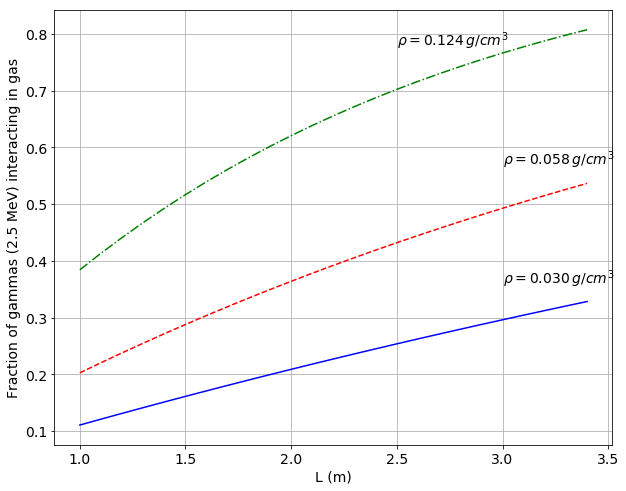

In [23]:
plt.plot(L / m, I0520,'b')
plt.plot(L / m, I1020,'r--')
plt.plot(L / m, I2020,'g-.')
plt.grid(True)
plt.xlabel('L (m)')
plt.ylabel('Fraction of gammas (2.5 MeV) interacting in gas')
plt.text(2.5, 0.78, r'$\rho={0:5.3f} \, g/cm^3$'.format(rho_2020/ (g/cm3)))
plt.text(3, 0.57, r'$\rho={0:5.3f} \, g/cm^3$'.format(rho_1020/ (g/cm3)))
plt.text(3, 0.36, r'$\rho={0:5.3f} \, g/cm^3$'.format(rho_0520/ (g/cm3)))
plt.show()

In [260]:
from pynext.NextData import NextPVData

In [261]:
n100d = NextPVData()

In [262]:
n100d



        Next100PVData
        ------------------

        PV :
        inner diameter  = 1360.00 mm
        inner radius    =  680.00 mm
        outer diameter  = 1370.00 mm
        outer radius    =  685.00 mm
        body thickness  =   10.00 mm
        head thickness  =   12.00 mm
        length          = 1600.00 mm

        CS :
        inner diameter  = 1240.00 mm
        inner radius    =  620.00 mm
        outer diameter  = 1360.00 mm
        outer radius    =  680.00 mm
        body thickness  =  120.00 mm
        head thickness  =  120.00 mm
        length          = 1600.00 mm

        PB :
        inner diameter  = 1370.00 mm
        inner radius    =  685.00 mm
        outer diameter  = 1570.00 mm
        outer radius    =  785.00 mm
        body thickness  =  200.00 mm
        head thickness  =  200.00 mm
        length          = 1600.00 mm

    

In [263]:
from pynext.CylindricalVessel import CVD
from pynext.CylindricalVessel import CylindricalVessel

In [265]:
cvd_pv = CVD(name    = 'Next100PV',
                 R       = n100d.pv_inner_radius,
                 th_body = n100d.pv_body_thickness,
                 L       = n100d.pv_length,
                 th_head = n100d.pv_head_thickness)

pv = CylindricalVessel(name=cvd_pv.name, material=ti316, cvd=cvd_pv)

In [266]:
pv


        Cylindrical Vessel:

        ----------------
        name      = Next100PV
        material  = 316ti

        specific activity of material:
        Bi-214    =    1.00 mBq/kg
        Tl-208    =    0.15 mBq/kg

        body:
        R         =  680.00 mm
        thickness =   10.00 mm
        length    = 1600.00 mm
        surface   = 6.84e+06 mm2
        volume    = 6.89e+07 mm3
        mass      =  541.96 kg
        activity Bi-214 =  541.96 mBq, self-shielded = 195.19 mBq
        activity Tl-208 =   81.29 mBq, self-shielded =  29.28 mBq
        transmittance   = 7.36e-01

        heads:
        thickness =   12.00 mm
        surface   = 2.91e+06 mm2
        volume    = 3.49e+07 mm3
        mass      =  274.38 kg
        activity Bi-214 =  137.19 mBq, self-shielded =  47.44 mBq
        activity Tl-208 =   20.58 mBq, self-shielded =   7.12 mBq
        transmittance   = 6.92e-01

        

In [276]:
pv.cv.body.shape.inner_surface() / m2

6.83610561421139

In [280]:
2 * pi * pv.cv.body.radius * pv.length  / m2

6.83610561421139

In [270]:
assert pv.cv.body.shape.inner_surface()  == approx(
    2 * pi * pv.cv.body.radius**2 * pv.length, rel=1e-5)

462400.0

In [271]:
pv.cv.body.radius**2

462400.0

In [259]:
ssert pv.cv.body.shape.shell_volume()  == approx(
    pi * (pv.radius**2 - pv.cv.body.radius**2) * pv.length, rel=1e-5)

137.1903855188013

In [256]:
pv.head_self_shield_activity_bi214 /mBq

47.444287521746354

In [ ]:
mass   =  pv.cv.head.shape.shell_volume() * ti316.rho
    assert pv.head_mass  == approx(mass, rel=1e-5)

In [ ]:
    activity_tl208 = pv.head_surface * pv.cv.head.material.surface_activity(pv.cvd.th_body,
                                                                       isotope='Tl208')
    assert pv.head_self_shield_activity_bi214  == approx(activity_bi214, rel=1e-1)

## Attenuation provided by the lead castle

#### Gamma activity in Canfranc

The rock walls of the underground laboratory are a rather intense source of high-energy
gammas due to the presence of trace radioactive contaminants in their composition. The
total gamma flux at LSC (Hall A) is 1.06 ± 0.24 cm−2 s−1, with contributions from 40K
(0.52 ± 0.23 cm−2 s−1), 238U (0.35 ± 0.03 cm−2 s−1) and 232Th (0.19 ± 0.04 cm−2 s−1)


In [99]:
G_238U   = 0.35 * Bq / cm2 
G_232Th  = 0.19 * Bq / cm2 
G_40K    = 0.52 * Bq / cm2 
G_LSC    = 1.06 * Bq / cm2
G_Bi214  = G_238U * 0.015
G_Tl208  = G_232Th * 0.36

In [100]:
pb_th = 20*cm # thickness of lead bricks

In [101]:
pbth = np.arange(0, 20, 0.1) * cm
T = np.array([pb.transmittance_at_qbb(l) for l in pbth]) 

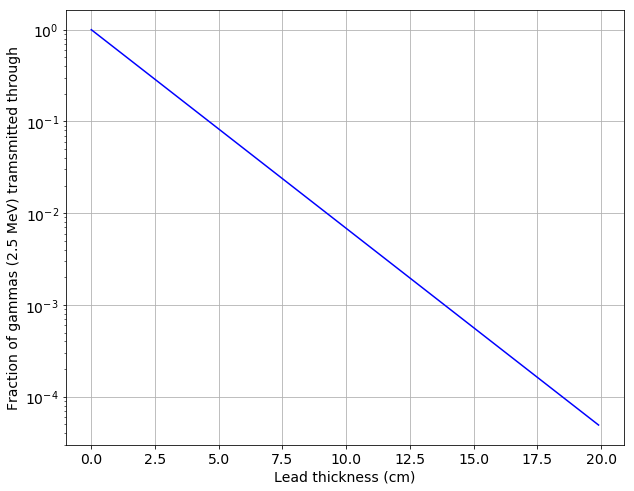

In [102]:
plt.semilogy(pbth / cm, T,'b')
plt.grid(True)
plt.xlabel('Lead thickness (cm)')
plt.ylabel('Fraction of gammas (2.5 MeV) tramsmitted through')
plt.show()

#### Lead shield reduce energetic gammas by four orders of magnitude

In [219]:
cuth = np.arange(0, 20, 0.1) * cm
T = np.array([cu12.transmittance_at_qbb(l) for l in cuth]) 

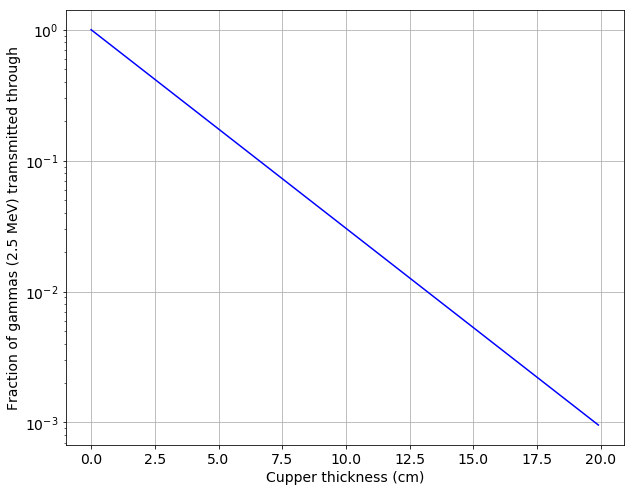

In [220]:
plt.semilogy(cuth / cm, T,'b')
plt.grid(True)
plt.xlabel('Cupper thickness (cm)')
plt.ylabel('Fraction of gammas (2.5 MeV) tramsmitted through')
plt.show()

#### Copper shielding provides ~2 orders of magnitude

### Cylindrical Vessel

A cylindrical vessel contains two physical volumes fille with the same material, one describing the body (e.g the cylinder itself) and the other describing the heads (the end-cups). 

In [151]:
from pynext.PressureVessel import CylindricalVessel
from pynext.PressureVessel import CVD, CVA

In [204]:
PV_ID = 1360 * mm  # PV inner diameter
PVS_TH = 10  * mm # PV shell thickness
PVH_TH = 12  * mm # PV head thickness
PV_L  = 1600 * mm

PB_TH = 200  * mm 
CU_TH = 120  * mm 

PV_IR  = PV_ID / 2
PV_OD  = PV_ID + PVS_TH
PV_OR  = PV_OD / 2

CU_ID = PV_ID - CU_TH
CU_OD = PV_ID
CU_IR = CU_ID / 2
CU_OR = CU_OD / 2
CU_L  = PV_L

VE_TH = 1 * mm # fake thickness used for envelop

In [159]:
cvd_pv = CVD('Next100PV', R=PV_IR, th_body=PVS_TH, L=PV_L, th_head=PVH_TH)
cvd_pv

CVD(name='Next100PV', R=680.0, th_body=10.0, L=1600.0, th_head=12.0)

In [161]:
pv = CylindricalVessel(name='Next100PV', material=ti316, cvd=cvd_pv)
pv


        Cylindrical Vessel:

        ----------------
        name      = Next100PV
        material  = 316ti

        specific activity of material:
        Bi-214    =    1.00 mBq/kg
        Tl-208    =    0.15 mBq/kg

        body:
        R         =  680.00 mm
        thickness =   10.00 mm
        length    = 1600.00 mm
        surface   = 6.84e+06 mm2
        volume    = 6.89e+07 mm3
        mass      =  541.96 kg
        activity Bi-214 =  541.96 mBq, self-shielded = 195.19 mBq
        activity Tl-208 =   81.29 mBq, self-shielded =  29.28 mBq
        transmittance   =    0.74

        heads:
        thickness =   12.00 mm
        surface   = 2.91e+06 mm2
        volume    = 3.49e+07 mm3
        mass      =  274.38 kg
        activity Bi-214 =  137.19 mBq, self-shielded =  47.44 mBq
        activity Tl-208 =   20.58 mBq, self-shielded =   7.12 mBq
        transmittance   =    0.69

        

### A test to show that shelf-shielded activity is consistent

$A_s = A * \alpha$
where A is the activity without self-shield, $A_s$~is the self-shielded activity and $\alpha$ is the
attenuation factor due to the self-shielding

#### Attenuation factor

In [163]:
from scipy.integrate import quad

In [164]:
att = SelfAtt(mu=pv.cv.body.material.mu, L=PVS_TH)
tf, _ = quad(att.f, -np.pi/2 + 0.0001, np.pi/2 -  0.0001)

In [165]:
attf = tf / (2 * pi)

####  $A_s = A * \alpha$

In [166]:
pv.body_activity_bi214 * attf / mBq

196.62818100609954

In [167]:
pv.body_self_shield_activity_bi214 / mBq

195.19293880897476

In [168]:
from pytest import approx

In [169]:
assert pv.body_self_shield_activity_bi214   == approx(pv.body_activity_bi214 * attf, rel=1e-1)

### Computing initial flux from lab crossing NEXT

1. Define a Cylindrical Vessel of NEXT-100 dimensions filled with vacuum (no self-shielding)
2. Compute the total activity entering the detector as the product of the surfaces of the envelop volumes and the LSC flux. 

In [173]:
def punit(val, unit):
    u = eval(unit)
    return "{:7.2f} {:s}".format(val / u, unit)

In [198]:
def activity_lsc_gammas_through_CV(cv):
    """Returns the activity of gammas through a cylindrical vessel (cv)"""
       
    activity = CVA(name = 'Total activity',
                     body_bi214 = G_Bi214 * cv.body_surface,
                     head_bi214 = 2 * G_Bi214 * cv.head_surface,
                     body_tl208 = G_Tl208 * cv.body_surface,
                     head_tl208 = 2 * G_Tl208 * cv.head_surface)
    
    
    return activity

In [202]:
def activity_gammas_transmitted_CV(cv, ia):
    """For a cylindrical vessel (cv) and an incoming activity (ia)
       compute the transmitted activity
       
       """
        
    activity = CVA(name = 'Trasmitted activity',
                     body_bi214 = ia.body_bi214 * cv.body_transmittance,
                     head_bi214 = ia.head_bi214 * cv.body_transmittance,
                     body_tl208 = ia.head_tl208 * cv.head_transmittance,
                     head_tl208 = ia.head_tl208 * cv.body_transmittance)
    
    return activity

In [175]:
def print_activity(act, unit='Bq'):
    
    print("""
    activity of {}
    body  (Bi-214) = {} 
    head  (Bi-214) = {} 
    total (Bi-214) = {} 
    body  (Tl-208) = {} 
    head  (Tl-208) = {} 
    total (Tl-208) = {} 
""".format(act.name, punit(act.body_bi214,unit), punit(act.head_bi214,unit), 
           punit(act.body_bi214 + act.head_bi214, unit),
           punit(act.body_tl208,unit), punit(act.head_tl208,unit), punit(act.body_tl208 + act.head_tl208,unit)))

In [176]:
n100_envelop = CylindricalVessel(name='Next100Envelop', material=vacuum, cvd=cvd_pv)
n100_envelop


        Cylindrical Vessel:

        ----------------
        name      = Next100PV
        material  = vacuum

        specific activity of material:
        Bi-214    =    0.00 mBq/kg
        Tl-208    =    0.00 mBq/kg

        body:
        R         =  680.00 mm
        thickness =   10.00 mm
        length    = 1600.00 mm
        surface   = 6.84e+06 mm2
        volume    = 6.89e+07 mm3
        mass      =    0.00 kg
        activity Bi-214 =    0.00 mBq, self-shielded =   0.00 mBq
        activity Tl-208 =    0.00 mBq, self-shielded =   0.00 mBq
        transmittance   =    1.00

        heads:
        thickness =   12.00 mm
        surface   = 2.91e+06 mm2
        volume    = 3.49e+07 mm3
        mass      =    0.00 kg
        activity Bi-214 =    0.00 mBq, self-shielded =   0.00 mBq
        activity Tl-208 =    0.00 mBq, self-shielded =   0.00 mBq
        transmittance   =    1.00

        

In [200]:
lsc_activity_next_100 = activity_lsc_gammas_through_CV(n100_envelop)
print_activity(lsc_activity_next_100, unit='Bq')


    activity of Total activity
    body  (Bi-214) =  358.90 Bq 
    head  (Bi-214) =  152.53 Bq 
    total (Bi-214) =  511.43 Bq 
    body  (Tl-208) = 4675.90 Bq 
    head  (Tl-208) = 1987.26 Bq 
    total (Tl-208) = 6663.15 Bq 



#### test

In [201]:
assert (act.body_bi214 / act.body_tl208) / (G_Bi214 / G_Tl208)   == approx(1, rel=1e-5)

## Shielding provided by the Lead Castle

1. Define a Cylindrical shell filled with PB with the thickness of the PB shield
2. Compute the transmittance through the shield.
3. Compute the self-shielded activity

In [192]:
cvd_pb = CVD(name='PBShield', R=PV_OR, th_body=PB_TH, L=PV_L, th_head=PB_TH)

In [193]:
n100_pb = CylindricalVessel(name='Next100Pb', material=pb, cvd=cvd_pb)
n100_pb


        Cylindrical Vessel:

        ----------------
        name      = PBShield
        material  = Pb

        specific activity of material:
        Bi-214    =    0.37 mBq/kg
        Tl-208    =    0.07 mBq/kg

        body:
        R         =  685.00 mm
        thickness =  200.00 mm
        length    = 1600.00 mm
        surface   = 6.89e+06 mm2
        volume    = 1.58e+09 mm3
        mass      = 17882.55 kg
        activity Bi-214 = 6616.54 mBq, self-shielded = 184.32 mBq
        activity Tl-208 = 1305.43 mBq, self-shielded =  36.37 mBq
        transmittance   = 4.68e-05

        heads:
        thickness =  200.00 mm
        surface   = 2.95e+06 mm2
        volume    = 5.90e+08 mm3
        mass      = 6680.68 kg
        activity Bi-214 = 1235.93 mBq, self-shielded =  39.46 mBq
        activity Tl-208 =  243.84 mBq, self-shielded =   7.78 mBq
        transmittance   = 4.68e-05

        

In [203]:
lsc_activity_transmitted_pb = activity_gammas_transmitted_CV(n100_pb , lsc_activity_next_100)
print_activity(lsc_activity_transmitted_pb, unit='mBq')


    activity of Trasmitted activity
    body  (Bi-214) =   16.78 mBq 
    head  (Bi-214) =    7.13 mBq 
    total (Bi-214) =   23.92 mBq 
    body  (Tl-208) =   92.93 mBq 
    head  (Tl-208) =   92.93 mBq 
    total (Tl-208) =  185.86 mBq 



## Shielding provided by the ICS

In [206]:
cvd_cu = CVD(name='CUShield', R=CU_IR, th_body=CU_TH, L=CU_L, th_head=CU_TH)
cvd_cu

CVD(name='CUShield', R=620.0, th_body=120.0, L=1600.0, th_head=120.0)

In [208]:
n100_cu = CylindricalVessel(name='Next100CU', material=cu12, cvd=cvd_cu)
n100_cu


        Cylindrical Vessel:

        ----------------
        name      = CUShield
        material  = CuUpperLimits

        specific activity of material:
        Bi-214    =    0.01 mBq/kg
        Tl-208    =    0.00 mBq/kg

        body:
        R         =  620.00 mm
        thickness =  120.00 mm
        length    = 1600.00 mm
        surface   = 6.23e+06 mm2
        volume    = 8.20e+08 mm3
        mass      = 7350.18 kg
        activity Bi-214 =   88.20 mBq, self-shielded =   6.06 mBq
        activity Tl-208 =   10.29 mBq, self-shielded =   0.71 mBq
        transmittance   = 1.51e-02

        heads:
        thickness =  120.00 mm
        surface   = 2.42e+06 mm2
        volume    = 2.90e+08 mm3
        mass      = 2596.88 kg
        activity Bi-214 =   15.58 mBq, self-shielded =   1.17 mBq
        activity Tl-208 =    1.82 mBq, self-shielded =   0.14 mBq
        transmittance   = 1.51e-02

        

In [210]:
lsc_activity_transmitted_cu = activity_gammas_transmitted_CV(n100_cu , lsc_activity_transmitted_pb)
print_activity(lsc_activity_transmitted_cu, unit='muBq')


    activity of Trasmitted activity
    body  (Bi-214) =  253.37 muBq 
    head  (Bi-214) =  107.68 muBq 
    total (Bi-214) =  361.06 muBq 
    body  (Tl-208) = 1402.96 muBq 
    head  (Tl-208) = 1402.96 muBq 
    total (Tl-208) = 2805.92 muBq 



In [ ]:
activity_gammas_transmitted_CV(cv, ia)

In [177]:
lead_wall_body = PhysicalVolume('WallBody', pb, lead_body)
lead_wall_head = PhysicalVolume('WallHead', pb, lead_head)

In [184]:
lsc_activity_through_castle_body_bi214 =(lsc_next_activity_bi214   * 
                                         lead_wall_body.material.transmittance_at_qbb(PB_TH))
lsc_activity_through_castle_head_bi214 =(lsc_next_activity_head_bi214 * 
                                         lead_wall_head.material.transmittance_at_qbb(PB_TH))

lsc_activity_through_castle_bi214 =(lsc_activity_through_castle_body_bi214 +
                                   lsc_activity_through_castle_head_bi214)

In [185]:
lsc_activity_through_castle_body_tl208 =(lsc_next_activity_tl208   * 
                                         lead_wall_body.material.transmittance_at_qbb(PB_TH))
lsc_activity_through_castle_head_tl208 =(lsc_next_activity_head_tl208 * 
                                         lead_wall_head.material.transmittance_at_qbb(PB_TH))

lsc_activity_through_castle_tl208 =(lsc_activity_through_castle_body_tl208 +
                                   lsc_activity_through_castle_head_tl208)

In [186]:
lsc_activity_through_castle_bi214 / mBq

2114.381347459451

In [187]:
lsc_activity_through_castle_tl208 / mBq

6343.144042378352

### Computing the shielding of the Copper Shield

1. Repeat the procedure for copper

In [182]:
cu_body = CylinderShell(Rin=CU_IR, Rout=CU_OR, L=PV_Z)
cu_head = Disk         (R=CU_OR, t=CU_TH)

In [183]:
cu_shield_body = PhysicalVolume('ShieldBody', cu, cu_body)
cu_shield_head = PhysicalVolume('ShieldHead', cu, cu_head)

In [190]:
lsc_activity_through_shield_body_bi214 =(lsc_activity_through_castle_body_bi214 * 
                                         cu_shield_body.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_head_bi214 =(lsc_activity_through_castle_head_bi214 * 
                                         cu_shield_head.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_bi214 =(lsc_activity_through_shield_body_bi214 +
                                   lsc_activity_through_shield_head_bi214)

In [191]:
lsc_activity_through_shield_body_tl208 =(lsc_activity_through_castle_body_tl208 * 
                                         cu_shield_body.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_head_tl208 =(lsc_activity_through_castle_head_tl208 * 
                                         cu_shield_head.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_tl208 =(lsc_activity_through_shield_body_tl208 +
                                   lsc_activity_through_shield_head_tl208)

In [192]:
lsc_activity_through_shield_bi214 / mBq

31.92015222680627

In [193]:
lsc_activity_through_shield_tl208 / mBq

95.7604566804188

### Pressure Vessel

In [209]:
pvs =CylinderShell(Rin=PV_IR, Rout=PV_OR, L=PV_Z)
pvh = Disk        (R=PV_OR, t=PV_TH)

In [210]:
pv_body = PhysicalVolume('PVBody', ti316, pvs)
pv_head = PhysicalVolume('PVHead', ti316, pvh)

In [216]:
pv_body.mass / kg

487.405634364807

In [218]:
pv_head.mass / kg

211.26889166480603

In [224]:
pv_body.S / m2

6.83610561421139

In [225]:
pv_head.S / m2

1.4913800061048001

In [219]:
pv_body_activity_bi214 = pv_body.activity_bi214_self_shield(PV_TH) 
pv_head_activity_bi214 = pv_head.activity_bi214_self_shield(PV_TH)

In [221]:
pv_body_activity_bi214 / mBq

248.01379438545175

In [222]:
pv_head_activity_bi214 / mBq

54.10724103145957

In [223]:
pv_body_activity_tl208 / mBq

248.01379438545175

In [212]:
pv_body_activity_tl208 = pv_body.activity_tl208_self_shield(PV_TH)
pv_head_activity_tl208 = pv_head.activity_tl208_self_shield(PV_TH)

In [214]:
print("""
activity PV body gamma 2448 keV (Bi-214) = {} Bq
activity PV body from LSC gamma 2614 keV (Tl-208) = {} Bq
""".format((pv_body_activity_bi214 + pv_head_activity_bi214 )/ mBq, 
           (pv_body_activity_tl208 + pv_head_activity_tl208)/ mBq))


activity PV body gamma 2448 keV (Bi-214) = 248.01379438545175 Bq
activity PV body from LSC gamma 2614 keV (Tl-208) = 248.01379438545175 Bq



In [ ]:
+ pv_head_activity_bi214 + pv_head_activity_tl208

In [ ]:
pv.activity_through_shield_bi214 = pv.activity_bi214_self_shield(PV_TH) 

### Inner Copper Shield

In [33]:
ICS_OD = PV_ID 
ICS_TH = 15 * cm # PV thickness
ICS_ID = ICS_OD - ICS_TH
ICS_Z = PV_Z

In [34]:
icss =CylinderShell(Rin=ICS_ID / 2, Rout=ICS_OD / 2, L=ICS_Z)
ics = PhysicalVolume('ICS', cu, icss)

In [35]:
ics.activity_bi214_self_shield(12 * cm) / mBq

1.5359752481551037

In [36]:
ics.activity_tl208_self_shield(12 * cm) / mBq

1.5359752481551037

In [37]:
ics.S / m2

6.0821233773498395

In [38]:
pv.S / m2

6.83610561421139

In [39]:
ics.material.transmittance_at_qbb(ICS_TH)

0.005291783205644898

### Shielding of ICS

In [40]:
pv.activity_bi214_self_shield(PV_TH)* ics.material.transmittance_at_qbb(ICS_TH)  / mBq

1.3124352318972006

In [41]:
tlsc_bi * ics.material.transmittance_at_qbb(ICS_TH) / mBq 

6.5612014829168075

### Class PressureVessel

In [125]:
from pynext.PressureVessel import PressureVessel
from pynext.PressureVessel import n100d, n100pv, n100cs

In [126]:
pv = PressureVessel(n100pv, n100cs)

In [127]:
pv


        Pressure Vessel:
        ----------------

        material = 316ti
        specific activity: Bi-214 =    1.00 mBq/kg Tl-208 =    1.00 mBq/kg
        body:
        R =   68.00 cm;  thickness =    1.80 cm; mass =  487.41 kg
        activity Bi-214 =  487.41 mBq, self-shielded = 248.01 mBq
        activity Tl-208 =  487.41 mBq, self-shielded = 248.01 mBq

        heads:
        thickness =    1.80 cm; mass =  411.57 kg
        activity Bi-214 =  205.79 mBq, self-shielded =  52.70 mBq
        activity Tl-208 =  205.79 mBq, self-shielded =  52.70 mBq

        flanges:
        thickness =    1.80 cm; mass =   22.08 kg
        activity Bi-214 =   11.04 mBq, self-shielded =   2.79 mBq
        activity Tl-208 =   11.04 mBq, self-shielded =   2.79 mBq

        Copper Shield
        material = Cu
        specific activity: Bi-214 =   12.00 muBq/kg Tl-208 =   12.00 muBq/kg
        body:
        thickness =   12.00 cm; mass = 3512.95 kg
        activity Bi-214 =   42.16 mBq, self-shielde

In [155]:
pv2.pvBody.V / m3

0.12467850268742596

In [160]:
pv2.pvBody.shape.inner_volume() / m3

2.3242759088318725

In [162]:
pv2.pvBody.shape.shell_volume() / m3

0.12467850268742596

In [163]:
Rin  =  n100d.d / 2
Rout = (n100d.d + n100d.t) / 2
L    = n100d.l

In [171]:
2 * pi * (Rout**2  - Rin**2) * L / m3

0.12386420187161548

In [167]:
Rout / m

0.689

In [168]:
Rin / m

0.68

In [170]:
L / m

1.6